In [1]:
# Tensor Basics

import torch

x = torch.rand(2,2,2)
x

tensor([[[0.5449, 0.4082],
         [0.5004, 0.2829]],

        [[0.2120, 0.6475],
         [0.3721, 0.4634]]])

In [2]:
#zeros
xx = torch.zeros(3,3, dtype=torch.int)
xx

#ones = torch.ones

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [3]:
xx.dtype

torch.int32

In [4]:
#size
xx.size()

torch.Size([3, 3])

In [5]:
# using list in tensors
x = torch.tensor([4.5, 0.9])
x

tensor([4.5000, 0.9000])

In [6]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z = x + y
c = torch.add(x,y)
print(x)
print(y)
print(z)
print(c)


tensor([[0.8435, 0.1328],
        [0.0183, 0.4014]])
tensor([[0.1442, 0.3509],
        [0.5087, 0.2960]])
tensor([[0.9877, 0.4837],
        [0.5270, 0.6974]])
tensor([[0.9877, 0.4837],
        [0.5270, 0.6974]])


In [7]:
# sub
c = torch.sub(x,y)
c

tensor([[ 0.6994, -0.2180],
        [-0.4904,  0.1053]])

In [8]:
# mul
d = torch.mul(x,y)
d

tensor([[0.1216, 0.0466],
        [0.0093, 0.1188]])

In [9]:
y.mul_(x)

tensor([[0.1216, 0.0466],
        [0.0093, 0.1188]])

In [10]:
# div
f = torch.div(x,y)
f

tensor([[6.9362, 2.8501],
        [1.9659, 3.3779]])

In [11]:
# slicing
x = torch.rand(5,3)
print(x)
print(x[:,0])

tensor([[0.9737, 0.8042, 0.9927],
        [0.5796, 0.3275, 0.1558],
        [0.0105, 0.5504, 0.7972],
        [0.3681, 0.4423, 0.9657],
        [0.1999, 0.3832, 0.5995]])
tensor([0.9737, 0.5796, 0.0105, 0.3681, 0.1999])


In [12]:
# reshaping
x = torch.rand(4,4)
print(x)
y = x.view(16)
print(y)

tensor([[0.0020, 0.3513, 0.4428, 0.1879],
        [0.4857, 0.4255, 0.3701, 0.8999],
        [0.8469, 0.0939, 0.2150, 0.0041],
        [0.4266, 0.3853, 0.7105, 0.3950]])
tensor([0.0020, 0.3513, 0.4428, 0.1879, 0.4857, 0.4255, 0.3701, 0.8999, 0.8469,
        0.0939, 0.2150, 0.0041, 0.4266, 0.3853, 0.7105, 0.3950])


In [13]:
# convert from numpy to tensor and vice versa
import numpy as np

a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [14]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [15]:
a =  np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [16]:
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

# Gradient Calculation with Autograd

In [17]:
x = torch.randn(3, requires_grad=True) #calculate the gradient with respect to X
x

tensor([ 0.7050, -0.5539, -0.9625], requires_grad=True)

In [18]:
y = x + 2
y

tensor([2.7050, 1.4461, 1.0375], grad_fn=<AddBackward0>)

In [19]:
z = y*y*2
z

tensor([14.6335,  4.1826,  2.1529], grad_fn=<MulBackward0>)

In [20]:
#z = z.mean()
z

tensor([14.6335,  4.1826,  2.1529], grad_fn=<MulBackward0>)

In [21]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx

In [22]:
x.grad

tensor([1.0820e+00, 5.7846e+00, 4.1501e-03])

In [23]:
# preventing pytorch from tracking the gradient functions history
#x.requires_grad_(False)
#x.detach()
#with torch.no_grad():

In [24]:
x.requires_grad_(False)
x

tensor([ 0.7050, -0.5539, -0.9625])

In [25]:
y = x.detach()
y

tensor([ 0.7050, -0.5539, -0.9625])

In [26]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([2.7050, 1.4461, 1.0375])


In [27]:
y

tensor([2.7050, 1.4461, 1.0375])

In [28]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropagation

- Forward pass: Compute loss
- Compute local gradients
- Backward pass: Compute dLoss / dWeights using the chain rule

yhat = w * x

Loss = (yhat - y)^2 = (wx -y)^2

Forward pass: x = A, y=2, w=A

In [29]:
#code implementation
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and the loss
y_hat = w * x
loss = (y_hat - y)**2


In [30]:
# backward pass
loss.backward()
w.grad

tensor(-2.)

# Gradient Descent with AutoGrad

In [31]:
# f = w * x
# f = 2 * x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward_pass(x):
    return w * x

# loss = MSE (Linear regression)
def loss (y, y_predicted):
    return ((y_predicted - y)**2).mean()


#gradient
#MSE  = 1/N * (w*x - y)**2
# dj/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()


print(f'Prediction before training: f(5)= {forward_pass(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward_pass(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    #update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w - {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {forward_pass(5):.3f}')


Prediction before training: f(5)= 0.000
epoch 1: w - 1.200, loss = 30.00000000
epoch 2: w - 1.680, loss = 4.79999924
epoch 3: w - 1.872, loss = 0.76800019
epoch 4: w - 1.949, loss = 0.12288000
epoch 5: w - 1.980, loss = 0.01966083
epoch 6: w - 1.992, loss = 0.00314570
epoch 7: w - 1.997, loss = 0.00050332
epoch 8: w - 1.999, loss = 0.00008053
epoch 9: w - 1.999, loss = 0.00001288
epoch 10: w - 2.000, loss = 0.00000206
Prediction after training: f(5)= 9.999


In [32]:
# using pytorch

# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward_pass(x):
    return w * x

# loss = MSE (Linear regression)
def loss (y, y_predicted):
    return ((y_predicted - y)**2).mean()



print(f'Prediction before training: f(5)= {forward_pass(5):.3f}')

# training
learning_rate = 0.01
n_iters = 1000

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward_pass(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward() #dl/dw

    #update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w - {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {forward_pass(5):.3f}')


Prediction before training: f(5)= 0.000
epoch 1: w - 0.300, loss = 30.00000000
epoch 11: w - 1.665, loss = 1.16278565
epoch 21: w - 1.934, loss = 0.04506890
epoch 31: w - 1.987, loss = 0.00174685
epoch 41: w - 1.997, loss = 0.00006770
epoch 51: w - 1.999, loss = 0.00000262
epoch 61: w - 2.000, loss = 0.00000010
epoch 71: w - 2.000, loss = 0.00000000
epoch 81: w - 2.000, loss = 0.00000000
epoch 91: w - 2.000, loss = 0.00000000
epoch 101: w - 2.000, loss = 0.00000000
epoch 111: w - 2.000, loss = 0.00000000
epoch 121: w - 2.000, loss = 0.00000000
epoch 131: w - 2.000, loss = 0.00000000
epoch 141: w - 2.000, loss = 0.00000000
epoch 151: w - 2.000, loss = 0.00000000
epoch 161: w - 2.000, loss = 0.00000000
epoch 171: w - 2.000, loss = 0.00000000
epoch 181: w - 2.000, loss = 0.00000000
epoch 191: w - 2.000, loss = 0.00000000
epoch 201: w - 2.000, loss = 0.00000000
epoch 211: w - 2.000, loss = 0.00000000
epoch 221: w - 2.000, loss = 0.00000000
epoch 231: w - 2.000, loss = 0.00000000
epoch 241:

# Training Pipeline

- Design model (input, output size, forward pass)
- Construct loss and optimizer
- Training loop:
-- forward pass: compute prediction
-- backward pass: gradients
-- update weights

In [33]:
# using pytorch

# f = w * x
# f = 2 * x
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples, n_features = X.shape

print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

X_test = torch.tensor([5], dtype=torch.float32)


print(f'Prediction before training: f(5)= {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 1000
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward() #dl/dw

    #update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 20 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5)= {model(X_test).item():.3f}')


4 1
Prediction before training: f(5)= 4.424
epoch 1: w = 0.859, loss = 7.60417128
epoch 21: w = 1.604, loss = 0.21068946
epoch 41: w = 1.645, loss = 0.18250301
epoch 61: w = 1.666, loss = 0.16187307
epoch 81: w = 1.686, loss = 0.14357778
epoch 101: w = 1.704, loss = 0.12735026
epoch 121: w = 1.721, loss = 0.11295677
epoch 141: w = 1.737, loss = 0.10019006
epoch 161: w = 1.753, loss = 0.08886632
epoch 181: w = 1.767, loss = 0.07882245
epoch 201: w = 1.781, loss = 0.06991369
epoch 221: w = 1.793, loss = 0.06201188
epoch 241: w = 1.805, loss = 0.05500312
epoch 261: w = 1.817, loss = 0.04878656
epoch 281: w = 1.827, loss = 0.04327257
epoch 301: w = 1.837, loss = 0.03838173
epoch 321: w = 1.847, loss = 0.03404374
epoch 341: w = 1.856, loss = 0.03019604
epoch 361: w = 1.864, loss = 0.02678321
epoch 381: w = 1.872, loss = 0.02375610
epoch 401: w = 1.880, loss = 0.02107111
epoch 421: w = 1.887, loss = 0.01868962
epoch 441: w = 1.893, loss = 0.01657725
epoch 461: w = 1.899, loss = 0.01470366
ep

# Linear Regression

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Steps:

- prepare data
- model
- loss and optimizer
- training loop

epoch: 10, loss = 1596.9702
epoch: 20, loss = 1218.4677
epoch: 30, loss = 955.8466
epoch: 40, loss = 773.4387
epoch: 50, loss = 646.6166
epoch: 60, loss = 558.3564
epoch: 70, loss = 496.8756
epoch: 80, loss = 454.0109
epoch: 90, loss = 424.0999
epoch: 100, loss = 403.2112
epoch: 110, loss = 388.6119
epoch: 120, loss = 378.4009
epoch: 130, loss = 371.2540
epoch: 140, loss = 366.2485
epoch: 150, loss = 362.7406
epoch: 160, loss = 360.2807
epoch: 170, loss = 358.5547
epoch: 180, loss = 357.3431
epoch: 190, loss = 356.4921
epoch: 200, loss = 355.8941


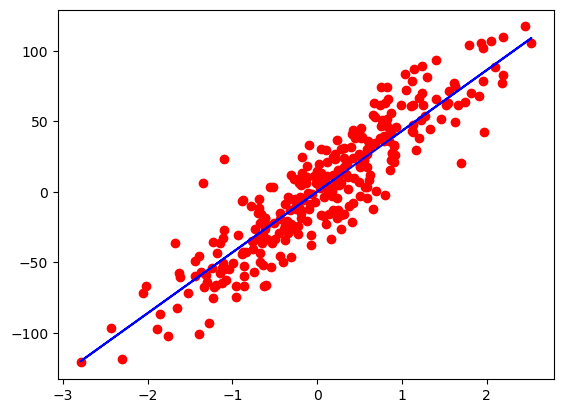

In [35]:
X_numpy, y_numpy = datasets.make_regression(n_samples=300, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #view is a pytorch method that does resampling

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 200
for epoch in range(num_epochs):

    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if  (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# plotting it
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

plt.show()

# Logistic Regression

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# data
breast = datasets.load_breast_cancer()
X, y = breast.data, breast.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 200
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss= {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_class = y_predicted.round()
    accuracy = y_predicted_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {accuracy:.4f}')


epoch: 10, loss= 0.7045
epoch: 20, loss= 0.5379
epoch: 30, loss= 0.4411
epoch: 40, loss= 0.3803
epoch: 50, loss= 0.3389
epoch: 60, loss= 0.3091
epoch: 70, loss= 0.2865
epoch: 80, loss= 0.2687
epoch: 90, loss= 0.2544
epoch: 100, loss= 0.2425
epoch: 110, loss= 0.2325
epoch: 120, loss= 0.2239
epoch: 130, loss= 0.2164
epoch: 140, loss= 0.2098
epoch: 150, loss= 0.2039
epoch: 160, loss= 0.1987
epoch: 170, loss= 0.1939
epoch: 180, loss= 0.1896
epoch: 190, loss= 0.1856
epoch: 200, loss= 0.1819
accuracy = 0.9649


# Dataset and DataLoader

In [38]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

In [39]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    

dataset = WineDataset()
first_data = dataset[0]
#features, labels = first_data
#print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)


tensor([[1.2600e+01, 1.3400e+00, 1.9000e+00, 1.8500e+01, 8.8000e+01, 1.4500e+00,
         1.3600e+00, 2.9000e-01, 1.3500e+00, 2.4500e+00, 1.0400e+00, 2.7700e+00,
         5.6200e+02],
        [1.3050e+01, 2.0500e+00, 3.2200e+00, 2.5000e+01, 1.2400e+02, 2.6300e+00,
         2.6800e+00, 4.7000e-01, 1.9200e+00, 3.5800e+00, 1.1300e+00, 3.2000e+00,
         8.3000e+02],
        [1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02],
        [1.3770e+01, 1.9000e+00, 2.6800e+00, 1.7100e+01, 1.1500e+02, 3.0000e+00,
         2.7900e+00, 3.9000e-01, 1.6800e+00, 6.3000e+00, 1.1300e+00, 2.9300e+00,
         1.3750e+03]]) tensor([[2.],
        [1.],
        [3.],
        [1.]])


In [40]:
# dummy training loop
epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)


178 45


In [41]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward pass
        if (i+1) % 5 == 0:
            print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_iterations}, inputs {inputs.shape}')

epoch1/200, step5/45, inputs torch.Size([4, 13])
epoch1/200, step10/45, inputs torch.Size([4, 13])
epoch1/200, step15/45, inputs torch.Size([4, 13])
epoch1/200, step20/45, inputs torch.Size([4, 13])
epoch1/200, step25/45, inputs torch.Size([4, 13])
epoch1/200, step30/45, inputs torch.Size([4, 13])
epoch1/200, step35/45, inputs torch.Size([4, 13])
epoch1/200, step40/45, inputs torch.Size([4, 13])
epoch1/200, step45/45, inputs torch.Size([2, 13])
epoch2/200, step5/45, inputs torch.Size([4, 13])
epoch2/200, step10/45, inputs torch.Size([4, 13])
epoch2/200, step15/45, inputs torch.Size([4, 13])
epoch2/200, step20/45, inputs torch.Size([4, 13])
epoch2/200, step25/45, inputs torch.Size([4, 13])
epoch2/200, step30/45, inputs torch.Size([4, 13])
epoch2/200, step35/45, inputs torch.Size([4, 13])
epoch2/200, step40/45, inputs torch.Size([4, 13])
epoch2/200, step45/45, inputs torch.Size([2, 13])
epoch3/200, step5/45, inputs torch.Size([4, 13])
epoch3/200, step10/45, inputs torch.Size([4, 13])
epo

# Dataset Transforms

In [42]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        #self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample =  self.x[index], self.y[index]

        if self.transform:
            sample = self.transform(sample)

        return sample
    
    def __len__(self):
        return self.n_samples
    

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
    
class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

dataset = WineDataset(transform=None)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)

first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features)

#dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

#dataiter = iter(dataloader)
#data = next(dataiter)
#features, labels = data
#print(features, labels)



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])


# Softmax and Cross Entropy

The softmax function converts a vector of K real numbers into a probability distribution of K possible outcomes

The activation function of a node in an ANN is a function that calculates the output of the node based on its individual inputs and their weights

In statistics, the logit function is the quantile function associated with the standard logistic distribution.

In mathematical optimization and decision theory, a loss function or cost function is a function that maps an event or values of one or more variables into a real number intuitively representing some cost associated with the event.

In pytorch, use nn.CrossEntropyLoss() no softmax at the end
use nn.BCELoss() with Sigmoid at the end

In [43]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 0.1, 1.0])
outputs = softmax(x)
print(f'softmax in numpy: {outputs}')

softmax in numpy: [0.65900114 0.09856589 0.24243297]


In [44]:
# in pytorch
x = torch.tensor([2.0, 0.1, 1.0])
outputs = torch.softmax(x, dim=0)

print(f'softmax in torch: {outputs}')

softmax in torch: tensor([0.6590, 0.0986, 0.2424])


In [45]:
# cross entropy
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss


Y = np.array([1, 0, 0])

y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.9])
l1 = cross_entropy(Y, y_pred_good)
l2 = cross_entropy(Y, y_pred_bad)
print(f'Loss1 entropy {l1}')
print(f'Loss2 entropy {l2}')

Loss1 entropy 0.35667494393873245
Loss2 entropy 2.3025850929940455


In [46]:
#torch
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0,1 ])

# nsamples * nclasses = 3*3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0,1.0,0.1], [0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[0.1,1.0,0.1], [0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

0.3018244206905365
1.3278342485427856


In [47]:
_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1, predictions2)

tensor([2, 0, 1]) tensor([0, 1, 1])


In [48]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        y_pred = torch.sigmoid(out)
        return y_pred


model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Activation Functions

Activation functions apply a non-linear transformation and decide whether a neutron should be activated or not

WIth non-linear transformations, the network can learn better and perform more complex tasks

Popular activation functions

- Step function
- Sigmoid
- TanH
- ReLU
- Leaky ReLU
- Softmax

In [49]:
import torch.nn.functional as F

# create nn modules
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()


    def forward(elf, x):
        out = self.linear(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [50]:
# or use activation functions directly in forward pass

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out - torch.sigmoid(self.linear2(out))
        return out

# Feed forward Neural Network

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


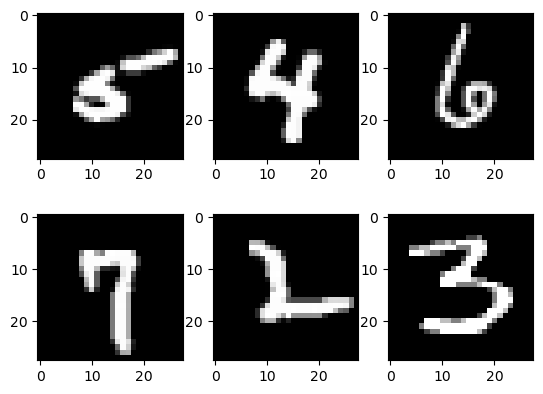

In [8]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy: {acc:.2f}%')

epoch 1/ 2, step 100/600, loss = 0.3447
epoch 1/ 2, step 200/600, loss = 0.3756
epoch 1/ 2, step 300/600, loss = 0.3292
epoch 1/ 2, step 400/600, loss = 0.2798
epoch 1/ 2, step 500/600, loss = 0.2226
epoch 1/ 2, step 600/600, loss = 0.2661
epoch 2/ 2, step 100/600, loss = 0.2192
epoch 2/ 2, step 200/600, loss = 0.2205
epoch 2/ 2, step 300/600, loss = 0.3775
epoch 2/ 2, step 400/600, loss = 0.0586
epoch 2/ 2, step 500/600, loss = 0.2330
epoch 2/ 2, step 600/600, loss = 0.1823
Accuracy: 0.92%


# Convolutional Neural Networks

CNN is used for analyzing visual data, it's effective in image and video recognition, classification and segmentation.

It was designed to automatically and adapt to learn spatial hierarchies of features through backpropagation by usng multiple building blocks such as convolution layers, pooling layers and fully connected layers

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Convolutional neural network
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 2000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

# Testing the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.size(0)):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f}%')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc:.2f}%')


Files already downloaded and verified
Finished Training
Accuracy of the network: 10.72%
Accuracy of plane: 61.60%
Accuracy of car: 0.00%
Accuracy of bird: 0.00%
Accuracy of cat: 0.00%
Accuracy of deer: 0.00%
Accuracy of dog: 11.50%
Accuracy of frog: 0.00%
Accuracy of horse: 0.00%
Accuracy of ship: 34.10%
Accuracy of truck: 0.00%


# Transfer Learning

Allows rapid development of new models

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)

    ]),
}

# import data

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


FileNotFoundError: [Errno 2] No such file or directory: 'hymenoptera_data/train'

/home/ebuka/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ebuka/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ebuka/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [02:23<00:00, 325kB/s]


Epoch 0/1
----------
train Loss: 0.5816 Acc: 0.6967
val Loss: 0.1732 Acc: 0.9346

Epoch 1/1
----------
train Loss: 0.4568 Acc: 0.8156
val Loss: 0.2114 Acc: 0.9150

Finished Training


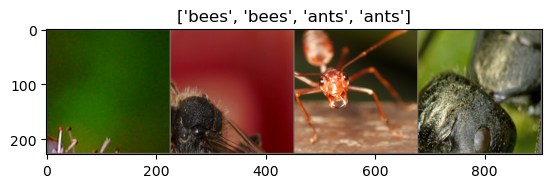

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import os

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_classes = 2
num_epochs = 2
batch_size = 4
learning_rate = 0.001

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #mean and std
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Function to train the model
def train_model(model, criterion, optimizer, num_epochs=2):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model

# Use a pre-trained model and reset the final fully connected layer
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, num_classes)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=learning_rate, momentum=0.9)

# Train and evaluate
model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=num_epochs)

print('Finished Training')

# Save the model
torch.save(model_ft.state_dict(), 'hymenoptera_model.pth')

# Function to visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])
